# Homework Assignment 2

In [4]:
from sympy import*
import numpy as np
from sympy.abc import x,y,z,u,v,w,t
from dtumathtools import *
from IPython.display import display, Latex, Image

## Problem 1

A function $f:\mathbb{R} \rightarrow \mathbb{R}$ is given by the expression:

\begin{equation*}
f(x)=\cos (3x).
\end{equation*}

a) Determine the approximating polynomial $P_{4,f,x_0}$ of degree (at most) $4$ with expansion point $x_0 = 0$.

b) Use the polynomial you found to compute an approximate value of $\cos (\frac{1}{2} )$, and estimate how far the found value is from the exact value.

We are given the following information about a function $g$:

\begin{equation*}
g(0)=1  \quad \text{and} \quad  g^{(n)} (0)=  
\begin{cases}  
  (-1)^{\frac{n}{2}}2^n & n \text{ is even}, \\
  0 &  n  \text{ is odd}.
\end{cases}  
\end{equation*}

c) Determine the approximating polynomial $P_{7,g,x_0}$ of $g$ of degree (at most) $7$ with expansion point $x_0 = 0$. Give your best suggestion on which function $g$ might be.

In [4]:
f = cos(3*x)  #define the function
P_4 = series(f,x0=0,n=5).removeO()  #determining the approximation polynomial of degree 4
P_4

27*x**4/8 - 9*x**2/2 + 1

To evaluate $\cos(\frac{1}{2})$ we need to find such $x$ that $3x = \frac{1}{2}$, $x = \frac{1}{6}$.

In [54]:
display(Latex(fr'$\cos (\frac{1}{2} ) = $ {P_4.subs(x,1/6)}')) #substitute x = 1/6 into P_4 expression and display it

<IPython.core.display.Latex object>

The error estimation is then $R_{n,f,x_0} = f^{(n+1)}_{\xi}\frac{1}{(n+1)!}(x-x_0)^{n+1}$, where $\xi \in[x_0,x], n=4$.
\begin{equation}
R_{4,f,0}(x) = f^{(5)}_{\xi}\frac{1}{5!}(x)^{5}
\end{equation}
\begin{equation}
f^{(5)}_{\xi} = -27*9\sin(3\xi), \xi \in [0, \frac{1}{6}]
\end{equation}
We need to choose $\xi$ such that $|R_{4,f,0}|$ is the maximum possible value on the $[0, \frac{1}{6}]$ interval, therefore $\xi = \frac{1}{6}$.
\begin{equation}
R_{4,f,0}(\frac{1}{6}) = \frac{-27*9}{5!}\sin(3\frac{1}{6})(\frac{1}{6})^{5}
\end{equation}

In [59]:
R_4 = -27*9/(120 * 6**5)*sin(0.5)
abs(R_4)

0.000124850400678178

The greates error $R_{4,f,0}(\frac{1}{6}) = 0.0001248$

In [62]:
display(Latex(fr'$\cos(\frac{1}{2}) \in$ [{P_4.subs(x,1/6)+R_4}, {P_4.subs(x,1/6)-R_4}]'))

<IPython.core.display.Latex object>

The true value of $\cos(\frac{1}{2})$ is $0.8775826$, which is in the found range above.

We are given the following information about a function $g$:

\begin{equation*}
g(0)=1  \quad \text{and} \quad  g^{(n)} (0)=  
\begin{cases}  
  (-1)^{\frac{n}{2}}2^n & n \text{ is even}, \\
  0 &  n  \text{ is odd}.
\end{cases}  
\end{equation*}
The approximating polynomial $P_{7,g,x_0}$ of $g$ of degree $7$ with expansion point $x_0 = 0$ is then will be
\begin{align}
& P_{7,g,0}(x) = g(0) + g^{1}(0)x +  \frac{1}{2}g^{2}(0)x^2 + \frac{1}{6}g^{3}(0)x^3 + \frac{1}{24}g^{4}(0)x^4 + \frac{1}{120}g^{5}(0)x^5 + \frac{1}{720}g^{6}(0)x^6 + \frac{1}{5040}g^{7}(0)x^7 \\
& P_{7,g,0}(x) = 1 + 0*x - 2x^2 + \frac{1}{6}*0*x^3 + \frac{2}{3}x^4 + \frac{1}{120}*0*x^5 - \frac{4}{45}g^{6}(0)x^6 + \frac{1}{5040}*0*x^7 \\
& P_{7,g,0}(x) = 1 - 2x^2 + \frac{2}{3}x^4 - \frac{4}{45}x^6
\end{align}

The expansion of the function $g$ we got above is very similar to the expansion of the $f$ function, so the $g$ function can also be some sort of $\cos$. If we take a look at the $-2x^2$ term, which equals $g^{(2)}(0)$, and assuming $g(x) = \cos(ax)$, the $a$ should be $2$.

We can check it by plotting the expansion and the function on the interval $[x_1,x_2]$ near the point $x_0$.

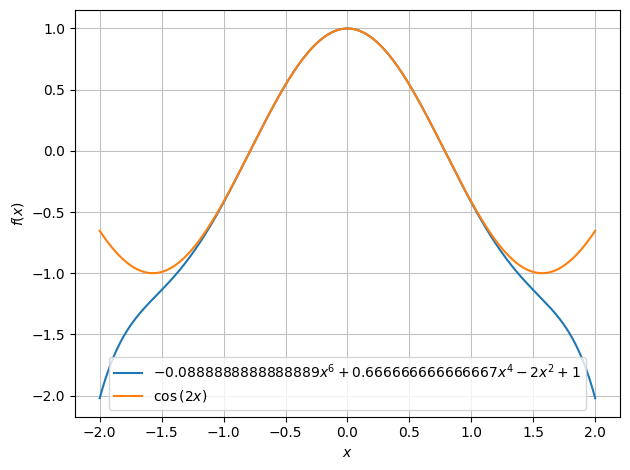

In [82]:
P_7 = 1-2*x**2 + 2/3*x**4 - 4/45*x**6
fig = dtuplot.plot(P_7,(x, -2,2), show=False)
#fig.extend(dtuplot.plot(P_4,(x, -2,2), show=False))
fig.extend(dtuplot.plot(cos(2*x),(x,-2,2),show=False))
fig.show()

Based on the graph, our assumption can be considered correct. $g(x) = cos(2x)$

## Problem 2

Let $B$ be the set $B=\left\{ (x_1 , x_2) \in \mathbb{R}^2 \mid x_1^2 + x_2^2 \leq 1 \wedge x_1 \geq 0 \right\}$.

A function $f:B \rightarrow \mathbb{R}$ is given by 

\begin{equation*}
f(x_1 ,x_2 )=x_1^2 x_2^2 +3x_1 x_2 +x_2 -4.
\end{equation*}

State the image of $f$.

To find the image of $f$ we need to find the local maximum and minimum of the function among the set of points $(x1, x2) \in B$.

The first step will be defining the parameterization plane. We know that $x_1^2 + x_2^2 \leq 1 \wedge x_1 \geq 0$ is a half circle.
\begin{equation}
r = [t \ cos(u), t \sin(u)], t \in [0,1], u \in [-\frac{\pi}{2}, \frac{\pi}{2}]
\end{equation}

To check the parameterization plane we can plot it

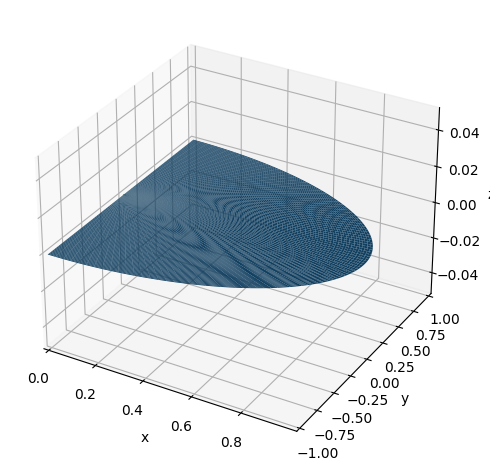

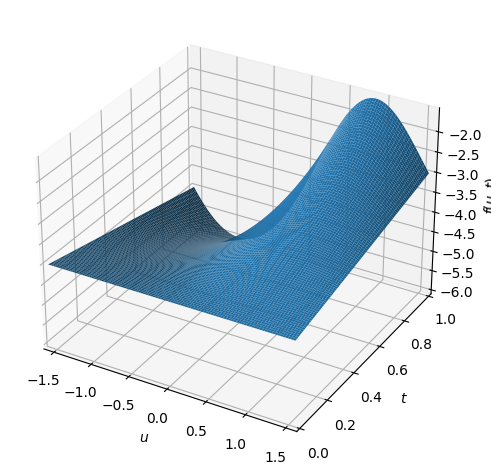

In [6]:
r = [t*cos(u), t*sin(u)] # defining a parameterization plane
f = x**2*y**2 + 3*x*y + y - 4  # defining a function f with x1=x and x2=y
param = {x: r[0], y: r[1]}   # creating  a dictionary of parametric expressions
dtuplot.plot3d_parametric_surface(r[0],r[1], 0, (u,-pi/2,pi/2), (t, 0, 1))  # plotting the plane 
dtuplot.plot3d(f.subs(param), (u,-pi/2,pi/2), (t, 0, 1))  # plotting the function parameterized by our plane 
#dtuplot.plot3d(f, (x, -5, 5), (y, -5, 5))  # function itself

From the 2 plots above it is evident that $f$ is continuous and differentiable for all $t \in [0,1] \text{ and } u \in [-\frac{\pi}{2}, \frac{\pi}{2}]$.

The next step will be finding stationary points by finding the gradient of the function and equating it to 0.

In [160]:
Nf = dtutools.gradient(f) # finding gradient
S = Nf.subs(param) # substituting t*cos(u) instead of x and t*sin(u) instead of y
sol = solve(S, u, t) # solving for t and u
sol_check = solve(Nf, x, y) # the same thing without substituting parameterization to check
sol, sol_check  # displaying solutions

([(0, -1/3)], [(-1/3, 0)])

$u = 0$ and $t = -\frac{1}{3}$, as we can see the $t$ value is out of the range we defined previously, and it doesn't make any sense for the radius to be negative, therefore there are no stationary points.

The third and last step would be boundary investigation, as it is obvious from the plot above that the function has a global maximum and minimum on the boundary. 

As it is the boundary of $ r(u,t) = [t \ cos(u), t \sin(u)], t \in [0,1], u \in [-\frac{\pi}{2}, \frac{\pi}{2}]$, $t$ must be $1$. We should have also tested the boundary $r_{1}(u) = [0, u], u \in [0,1]$, but as we have plotted the function and it is clear that maximum and minimum values are on the boundary parameterized by the $r(u,1) = [\cos(u),\sin(u)]$ we won't further investigate the $r_{1}(u)$ boundary.

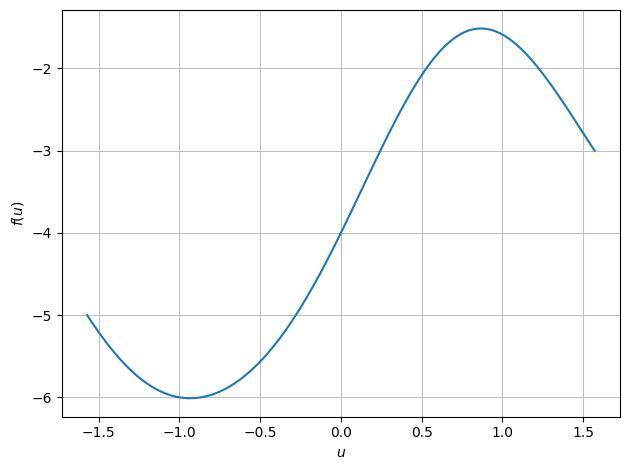

-2*sin(u)**3*cos(u) - 3*sin(u)**2 + 2*sin(u)*cos(u)**3 + 3*cos(u)**2 + cos(u)

In [10]:
param1 = {x: cos(u), y: sin(u)} # creating  a dictionary of parametric expressions
dtuplot.plot(f.subs(param1), (u,-pi/2,pi/2)) # plotting the line we got for u in [-pi/2, pi/2]
B = dtutools.gradient(f.subs(param1)) # finding gradient(derivative) with respect to u of the function f
display(B) #display the derivative

Before we proceed to solve the equation, it is worth mentioning that solving the equation above symbolically, e.g. using ```solve()```, yields a system of equations. We would rather use numerical solver ```nsolve```. 

In [164]:
sol_1 = nsolve(B, u, -1) # find first solution around u=-1
sol_2 = nsolve(B, u, 0.8) # finding second solution around u=0.8
sol_1, sol_2

(-0.933199076006191, 0.866924817752369)

In [167]:
f.subs({x: cos(sol_1), y: sin(sol_1)}), f.subs({x: cos(sol_2), y: sin(sol_2)})

(-6.00968504213171, -1.51414118184529)

Our image is then $im(f)=[-6.0096, -1.5141]$.

## Problem 3

A function $f:\mathbb{R}^2 \rightarrow \mathbb{R}$ is given by 

\begin{equation*}
f(x_1 ,x_2 )=x_1^2 - 2x_1 +3x_2^5 - 5x_2^3.
\end{equation*}

a) Determine all stationary points of $f$.

b) State whether there is a local maximum, a local minimum, or whether there is a saddle point at the stationary points.

c) Plot for each stationary point the function along with the approximating polynomial $P_{2}$ of degree (at most) $2$.

As the domain $\Gamma$ of the function $f: \mathbb{R}^2 \rightarrow \mathbb{R}$ is defined on the whole $\mathbb{R}$ we can state that the function doesn't have boundaries. To get a feelig of how the function looks like it's been plotted below.

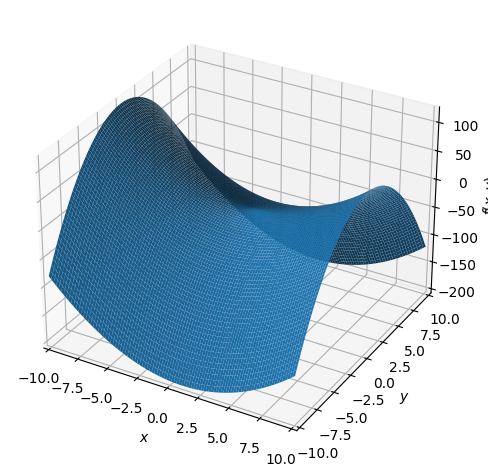

In [15]:
f = x**2-2*x + 3*y**2 - 5*y**2
dtuplot.plot3d(f, (x, -10, 10), (y,-10, 10))

Now we can procceed to finding the gradient and solving the system of 2 equations $\begin{cases} \frac{\partial f}{\partial x} = 0 \\ \frac{\partial f}{\partial y}= 0\end{cases}$

In [16]:
Nf = dtutools.gradient(f) #finding gradient
extremums = solve(Nf, x,y) #solving the system
display(Nf, extremums)

Matrix([
[2*x - 2],
[   -4*y]])

{x: 1, y: 0}

It is evident from gradient expression that $f$ is differentiable on the whole $\Gamma$. That is the only stationary points exist for this function are the points where the gradient equals to $0$. And we have already found such point: $(1,0)$. The next and the last step will be determination if the point local maximum, minimum or it is a saddle point.

In [17]:
H = dtutools.hessian(f) # finding a hessian matrix of f
display(H)

Matrix([
[2,  0],
[0, -4]])

As the hessian matrix is a diagonal matrix and the diagonal entries have opposite signs, it can be concluded that the function $f$ has one saddle point with coordinates $(1,0,-1)$.

For convinience we will write a python function that will take a function and expansion point and returns eproximation polynomial of the 2 degree. 

In [18]:
def P(f, x0, y0):
    p = {x: x0, y: y0}
    dx = Matrix([[x-x0],[y-y0]]) #defining x-x0 vector
    Nf = dtutools.gradient(f).subs(p) #finding gradient at the point (x0,y0)
    H = dtutools.hessian(f).subs(p) #finding hessian matrix at the point (x0,y0)
    return f.subs(p) + (Nf.T*dx)[0] + 0.5*dx.dot(H*dx) #returning taylor approxiamtion

P2 = P(f, 0, 0)
display(P2, P2.subs({x: 1 , y: 0}))

1.0*x**2 - 2*x - 2.0*y**2

-1.00000000000000

The approximation is obviously the same because the initial function is a polynomial itself.

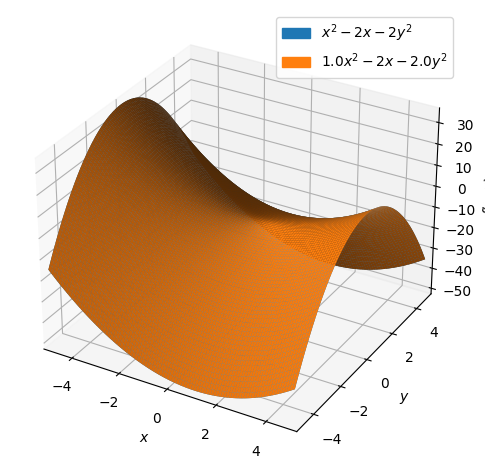

In [20]:
xlim = (x, -5, 5)
ylim = (y,-5, 5)
pl = dtuplot.plot3d(f, xlim, ylim, show=False) #plot the function
pl.extend(dtuplot.plot3d(P2, xlim, ylim, show=False)) #plot the approximating polynomial 
#pl.extend(dtuplot.scatter(np.array([1,0,-1]), rendering_kw={"color":'b'},show=False)) #the point
pl.show()

## Problem 4

A function $f:[0,5] \rightarrow \mathbb{R}$ is given by the expression $f(x)=2x+3$.

a) Determine, using Python, a value of the Riemann sum over the interval $[0,5]$ with 30 subintervals, where firstly the left interval end-points of the subintervals are used. Repeat with the right interval end-points.

b) Determine exact values of the Riemann sum over the interval $[0,5]$ with $n$ subintervals, where firstly the left interval end-points of the subintervals are used. Repeat with the right interval end-points.

c) Provide an exact expression for the maximal and minimal errors. Both expressions may only depend on $n$.

d) Argue in this special case for the fact that the Riemann sum has the same limit value regardless of the choice of point in the subintervals.

In [5]:
f = 2*x + 3 #defiing the function

The Riemann Sum on the interval $x \in [a,b]$ can be defined as $\sum_{i=1}^{n} f(x_i)\triangle x$, where $\triangle x = \frac{b-a}{n}$. $x_i$ that is at the beginning of $\triangle x$ interval defines the left sum and $x_i$ that is at the end of $\triangle x$ interval defines the right sum. For the left sum $x_i = a + i\triangle x, \, i = 0, 1, ... ,n-1$, for the right sum $x_i = a + i\triangle x, \, i = 1, ... ,n$

In [9]:
def riemann_right(f, interval, n):
    dx = (interval[1]-interval[0])/n #defining dx
    s = 0 # initial sum equals 0
    for i in range(n):
        s += f.subs(x, interval[0] + (i+1)*dx)*dx  #calculating and adding f(xi)dx to the sum
    return s
def riemann_left(f, interval, n):
    dx = (interval[1]-interval[0])/n  #defining dx
    s = 0   # initial sum equals 0
    for i in range(n):
        s += f.subs(x, interval[0] + i*dx)*dx #calculating and adding f(xi)dx to the sum
    return s

rsum = riemann_right(f, [0,5],30)
lsum = riemann_left(f, [0,5], 30)

display(rsum, lsum)

40.8333333333333

39.1666666666667

In [5]:
display(riemann_left(f, [0,5], 300000), riemann_right(f, [0,5],300000))

39.9999166666667

40.0000833333333

The Riemann Sum upproaches the true value of the integral $\int_{0}^{5} 2x - 3 \, dx$ as $n \rightarrow \infty$ or alternatively area under the line. 

The maximum error of the following method can be estimated by the $\triangle x|f(b) - f(a)| = \frac{b-a}{n}|f(b)-f(a)| = \frac{50}{n}$. That is essentialy the difference between the right and the left sum. We can check it using the results above.

In [11]:
max_err = 50/30
display(rsum - lsum, max_err)

1.66666666666668

1.6666666666666667

The minimum error will be the actual difference between the true area and the approximated one.

In [12]:
min_err = rsum - 40
min_err

0.833333333333336

As the function is linear, the slope is constant on the whole interval $[a,b]$, and the error of the upper sum will be the same as that of the left sum. 

$\textit{Proof}$

From the geometric consideration, the error can be estimated as the sum of triangles 
$\epsilon = \frac{1}{2}n \triangle x^2 f^{'}(x) = n(\frac{b-a}{n})^2 = \frac{(b-a)^2}{n} = \frac{25}{n}$, what is exactly half of the maximum error.

In [15]:
calc_err = 25/30
display(min_err, 40-lsum, calc_err) #assesing the difference between the left/right sum and the true area

0.833333333333336

0.833333333333343

0.8333333333333334

The differences are equal to each other and equal to the calculated above $\epsilon = \frac{25}{30}$. 

The image below visualizes left(blue) and right(orange) sums. 

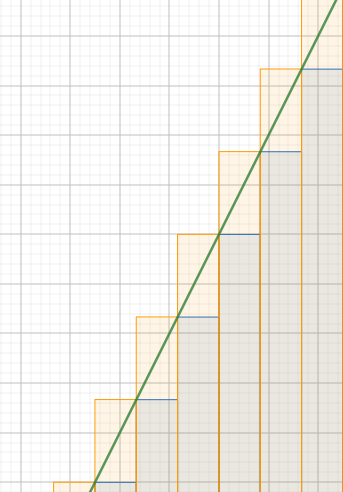

In [16]:
Image(filename="zoom.png", width=200, height=100)